In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [2]:
np.random.seed(98823)

In [3]:
n=30
x=np.array([np.random.random() for i in range(n)])

In [4]:
y=[np.sin(4*a)for a in x]

In [5]:
noise = np.random.normal(0,1/3,30)

In [6]:
y+=noise

In [7]:
y

array([ 0.17039204, -0.51915418,  0.21864273,  0.69832233, -0.26646686,
       -0.0657674 ,  0.02780901,  0.60952406,  1.02532239,  0.08758599,
        0.36073343,  0.67854036,  0.84068032,  1.28017752,  0.93379266,
       -0.26985836,  0.50217598,  0.66657166,  0.9345349 ,  0.07873222,
        0.53492449,  1.46202159,  1.03960359,  0.54638514,  0.49429317,
        0.76880862, -0.56329475,  0.70740841,  0.74117512,  0.57512359])

In [8]:
df=pd.DataFrame({'X':x,'Y':y})

In [9]:
df

,X,Y
0,0.618565,0.170392
1,0.882738,-0.519154
2,0.810349,0.218643
3,0.708156,0.698322
4,0.777921,-0.266467
5,0.652228,-0.065767
6,0.658577,0.027809
7,0.041528,0.609524
8,0.349068,1.025322
9,0.707169,0.087586


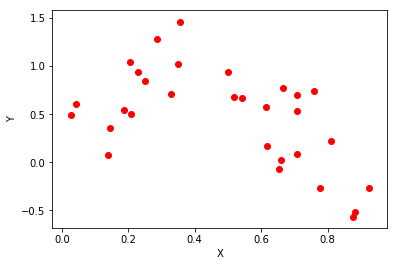

In [10]:
def plot(df,y):
    plt.scatter((df[df.columns[0]]),y,c='r')
    plt.xlabel('X')
    plt.ylabel('Y')
plot(df,df['Y'])   

In [11]:
def poly_features(df,deg):
    df_poly = df.copy()
    if(len(df_poly.shape)==1):
        df_poly=np.array(df_poly).reshape(-1,1)
    if(len(df)==1):
        df_poly=np.array(df_poly).reshape(1,-1)
    poly = PolynomialFeatures(deg)
    df_poly=poly.fit_transform(df_poly)
    return(df_poly)

In [12]:
clf=LinearRegression()

In [13]:
check=poly_features(df['X'],16)

In [14]:
model=clf.fit(check,df['Y'])

In [15]:
model.coef_

array([ 0.00000000e+00,  2.12657574e+04, -8.05929449e+05,  1.60628229e+07,
       -1.96051291e+08,  1.59730970e+09, -9.15415900e+09,  3.81346750e+10,
       -1.17828235e+11,  2.72946570e+11, -4.75281497e+11,  6.18605238e+11,
       -5.92417116e+11,  4.04964189e+11, -1.86914385e+11,  5.21813158e+10,
       -6.65313491e+09])

In [17]:
x_test = np.array([np.random.random() for i in range(200)])

In [18]:
y_pred=model.predict(poly_features(df['X'],16))

In [19]:
model.coef_ 

array([ 0.00000000e+00,  2.12657574e+04, -8.05929449e+05,  1.60628229e+07,
       -1.96051291e+08,  1.59730970e+09, -9.15415900e+09,  3.81346750e+10,
       -1.17828235e+11,  2.72946570e+11, -4.75281497e+11,  6.18605238e+11,
       -5.92417116e+11,  4.04964189e+11, -1.86914385e+11,  5.21813158e+10,
       -6.65313491e+09])

In [32]:
import operator
def plot_predictions(df,model,deg):
    plot(df,y)
    x_test = np.array([np.random.random() for i in range(200)])
    y_pred=model.predict(poly_features(x_test,deg))
    sort_zip = sorted(zip(x_test,y_pred))
    a,b=zip(*sort_zip)
    plt.plot(a,b)
    plt.axis([0,1,-2.0,2])
    

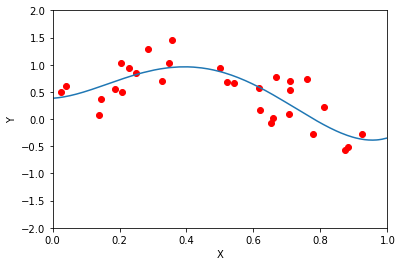

In [41]:
clf2=LinearRegression()
check2=poly_features(df['X'],4)
model2=clf2.fit(check2,df['Y'])
plot_predictions(df,model2,4)

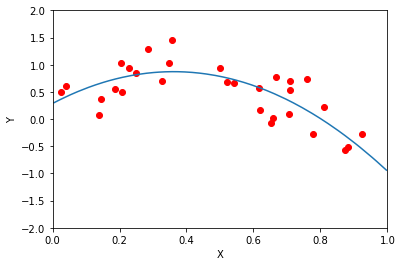

In [42]:
clf3=LinearRegression()
check2=poly_features(df['X'],2)
model2=clf2.fit(check2,df['Y'])
plot_predictions(df,model2,2)

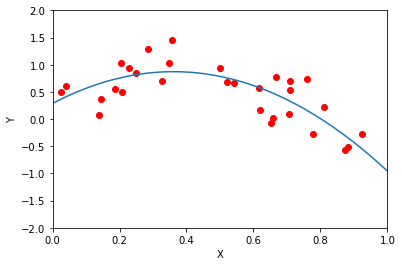

In [45]:
clf=LinearRegression()
check=poly_features(df['X'],2)
model=clf2.fit(check2,df['Y'])
plot_predictions(df,model2,2)

In [27]:
def kfold(df,deg,l2_val,y):
    df=poly_features(df['X'],deg)
    folds=KFold(len(df))
    
    l2_penalty_mse=[]
    min_mse=None
    best_l2=None
    best_model=None
    for l2 in l2_val:
        mse=0
        for train,test in folds.split(df):
            rid=Ridge(l2)
            rid_model=rid.fit(df[train],y[train])
            y_pred_rid=rid_model.predict(df[test])
            mse+=np.sum((y[test]-y_pred_rid)**2)
            
        mse/=len(df)
        l2_penalty_mse.append(mse)
        if(min_mse==None or mse < min_mse):
            min_mse=mse
            best_l2=l2
            best_model=rid_model
    return(l2_penalty_mse,best_l2,best_model)

In [32]:
val=np.logspace(-4,10,num=10)
l2_vals,best_l2,best_model=kfold(df,16,val,df['Y'])

In [36]:
best_l2

0.1291549665014884

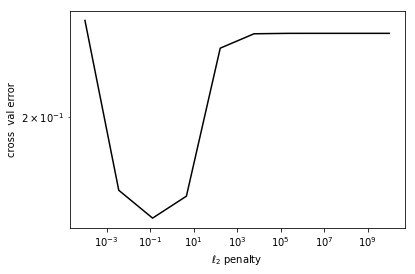

In [34]:
plt.plot(val,l2_vals,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('cross  val error')
plt.xscale('log')
plt.yscale('log')

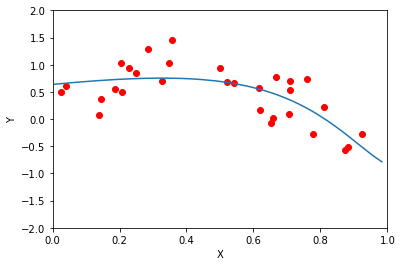

In [38]:
plot_predictions(df,best_model)